# Using multiple microphones to infer on-axis source levels
In the previous notebook we saw how the use of beam-shape patterns helped us infer on-axis source levels even in calls which were right censored. In this notebook we will investigate the use of multiple microphones and beam-shape modelling in the role of improving on-axis source level estimation. 

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np 
np.random.seed(100)
import pymc3 as pm
import pandas as pda
import sys 
sys.path.append('../../../research-repos/bat_beamshapes/')


In [2]:
import beamshape_predictions as b_p
db = lambda X: 20*np.log10(X)

### The situation: 2 mics and a bat
Imagine a case where you have two microphones on a line, and bat calls are recorded. For the sake simplicity we assume the bat is relatively far away, and you somehow magically know the position, and can therefore calculate the apparent source-level at 1 metre (a standard distance in echolocation). In the cartoon drawing below you can see the bat's head, it's beam-shape, and two mics in a line. 

![](twomicsandabat.png)

As can be expected, this might help us figure out the $\theta$ and on-axis level of a call. In our imaginary case above for instance, the upper mic is off-axis, while the lower mic is mostly on-axis. This specific difference in apparent source-level calculated at both mics can now be recreated by a much smaller parameter combination than a single mic scenario. Let's proceed to see how much this helps us. 

In [53]:
def vib_spherecap(thetas,kvalue,Rvalue,theta0):
    '''The array version of vibrating_cap_of_sphere for multiple theta values
    '''
    kwargs = {'R':Rvalue,'theta_0':theta0}
    outputs = [ b_p.vibrating_cap_of_sphere(each_theta,kvalue,**kwargs) for each_theta in thetas]
    return np.array(outputs)

In [74]:
theta_values = np.linspace(0,np.pi,200)
v_sound = 330 # m/s
freq = 90*10**3 # Hz
k_value = 2*np.pi/(v_sound/freq)
ball_rad = 0.2
ball_diam = 0.005
cap_theta = ball_diam/ball_rad

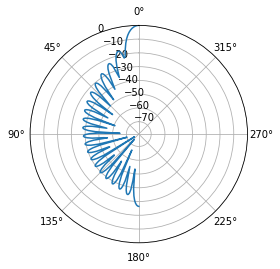

In [75]:
offaxis = db(vib_spherecap(theta_values,k_value,ball_rad,cap_theta))
plt.figure()
a0 = plt.subplot(111,projection='polar')
a0.set_theta_zero_location("N")
plt.plot(theta_values, offaxis)

In [59]:
help(b_p.vibrating_cap_of_sphere)

Help on function vibrating_cap_of_sphere in module beamshape_predictions:

vibrating_cap_of_sphere(theta, k, **kwargs)
    Parameters
    ----------
    theta: 0<=float<=2*pi
           The angle in azimuth/elevation at which the relative sound pressure is calculated.
           The relative soundpressure is calculated in comparison to the sound pressure level
           on-axis (0degrees/radians)
    
    k : float>0
        Wavenumber ( 2pi/wavelength)
    
    Keyword Arguments
    ------------------
    R : float>0
        Radius of the sphere
    
    theta_0 : float>0
              Aperture size of the vibrating cap in radians.
    
    w0 : float>0
        Defaults to 1 if unspecified.
    
    Returns
    --------
    H_theta : float>0
              The relative sound pressure in comparison to the on-axis.

